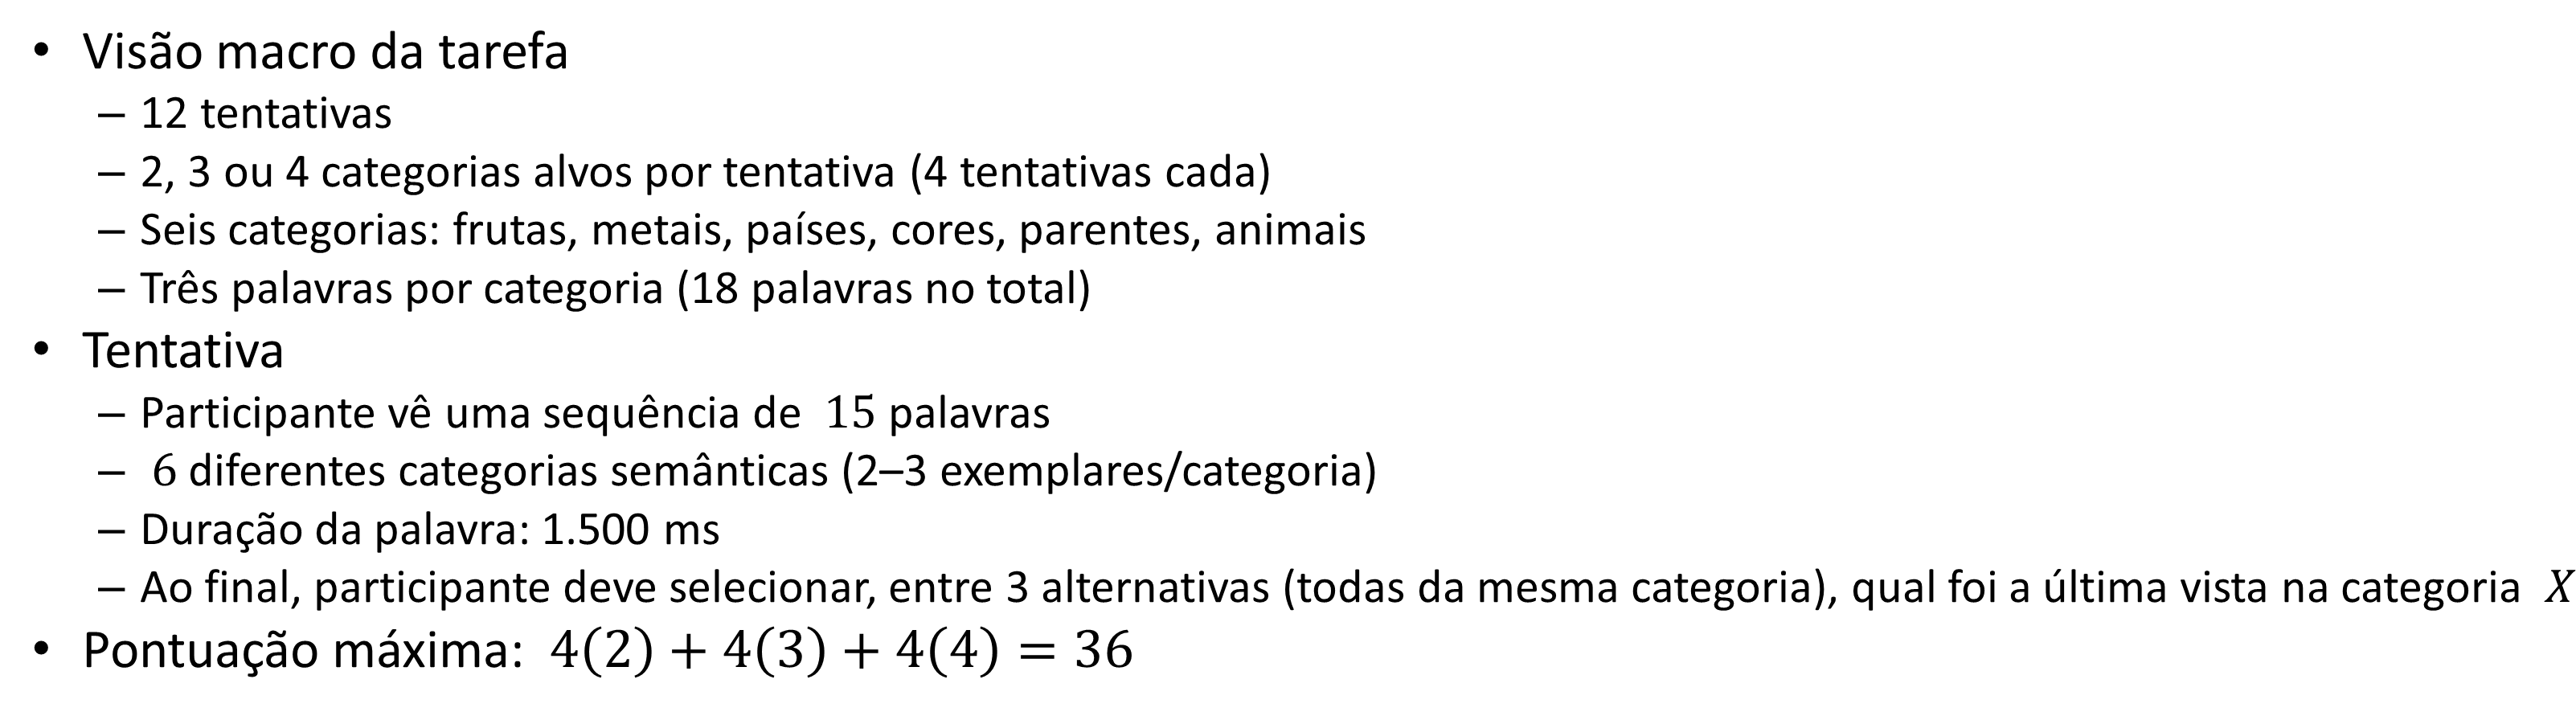

In [1]:
# importa biblioteca padrão para operações de aleatoriedade
import random

# Estímulos do experimento 
words = {
    "Frutas":   ["Maçã", "Banana", "Morango"],
    "Metais":   ["Alumínio", "Ferro", "Cobre"],
    "Países":   ["Japão", "Alemanha", "Canadá"],
    "Cores":    ["Vermelho", "Azul", "Amarelo"],
    "Parentes": ["Tia", "Pai", "Filha"],
    "Animais":  ["Zebra", "Baleia", "Urso"]   
}

# Cria variável com as categorias de palavras
categories = list(words.keys())

# Parâmetros do experimento
number_of_categories = [2, 3, 4] * 4
random.shuffle(number_of_categories) # embaralha tentativas

# define algumas constantes do experimento
N_TRIALS = len(number_of_categories)   # número total de tentativas (k = 12)
ITEMS_PER_TRIAL = 15                   # número de palavras por tentativa
ALL_CATS = categories[:]               # cópia da lista de categorias

# variáveis auxiliares
gender = {
    "Frutas": "f",
    "Metais": "m",
    "Países": "m",
    "Cores": "f",
    "Parentes": "m",
    "Animais": "m"
}

singular = {
    "Frutas": "fruta",
    "Metais": "metal",
    "Países": "país",
    "Cores": "cor",
    "Parentes": "parente",
    "Animais": "animal"
}

# cria função que constrói a pergunta para cada categoria-alvo
def pergunta_ultima(cat: str) -> str:
    g = gender[cat]   # f ou m   
    article = "o" if g == "m" else "a"
    ult = "último" if g == "m" else "última"
    return f"Qual foi {article} {ult} {singular[cat]}?"

# Geração das tentativas
trials = [] # aqui vamos armazenar todas as 12 tentativas geradas

# Loop para gerar cada tentativa
for t_idx, length in enumerate(number_of_categories[:N_TRIALS], start = 1):
    # 1) Sorteia as categorias-alvo desta tentativa
    random.shuffle(categories)   # embaralha as categorias
    current_targets = categories[:length] # pega as primeiras "length" categorias como alvo
    
    # 2) Decide quais categorias terão 3 exemplares e quais terão 2 exemplares
    cats_3 = set(random.sample(ALL_CATS, 3))
    cats_2 = [c for c in ALL_CATS if c not in cats_3]
    
    # 3) Monta o "pool" (bolsa) de palavras que compõem a tentativa
    trial_pool = [] # lista de pares (categoria, palavra)
    for cat in ALL_CATS:
        pool = words[cat][:] # pega as 3 palavras de uma dada categoria
        if cat in cats_2:
            dropped = random.choice(pool)
            pool.remove(dropped)
        for w in pool: # percorre as palavras do meu pool de palavras
            trial_pool.append((cat, w))
    
    # Sanity checks: verifica se o pool ficou correto
    assert len(trial_pool) == ITEMS_PER_TRIAL, "A tentativa não tem 15 itens!"
    assert len(set(trial_pool)) == ITEMS_PER_TRIAL, "Existem palavras duplicadas!"
    
    # 4) Embaralha a ordem de apresentação e cria o "last_seen"
    random.shuffle(trial_pool)
    sequence = trial_pool[:]
    last_seen = {}

    for cat, w in sequence:
        last_seen[cat] = w
    
    # 5) Constrói as perguntas só para as categorias-alvo
    # Cada pergunta terá: prompt (texto da pergunta), opções (3 alternativas)
    # a resposta correta e índice da correta (1, 2, 3)
    questions = []
    for cat in current_targets:
        prompt = pergunta_ultima(cat)
        correct_value = last_seen[cat]
        opts = words[cat][:]
        random.shuffle(opts)
        correct_index = opts.index(correct_value) + 1
        
        # empacote essa pergunta em um dicionário
        questions.append({
            "category": cat,
            "prompt": prompt,
            "options": opts,
            "correct_value": correct_value,
            "correct_index": correct_index
        })
        
    # 6) Empacota toda a tentativa em um dicionário
    trials.append({
        "trial_number": t_idx,
        "targets": current_targets,
        "cats_with_3": sorted(cats_3),
        "cats_with_2": sorted(cats_2),
        "sequence": sequence,
        "last_seen_by_category": last_seen,
        "questions": questions
    })
      
# Opcional
for trial in trials[:]:
    print(f"\n == Tentativa {trial['trial_number']} ==")
    print("Alvos:", ", ".join(trial['targets']))
    print("Categorias com 3 itens:", ", ".join(trial['cats_with_3']))
    print("Categorias com 2 itens:", ", ".join(trial['cats_with_2']))
    # imprime a sequência embaralhada no padrão categoria:palavra
    print("Sequência (cat:palavra):", " | ".join(f'{c}:{w}' for c, w in trial["sequence"]))
    
    # imprime cada pergunta, opções e gabarito
    for question in trial["questions"]:
        print(f"Pergunta: {question['prompt']}")
        for i, opt in enumerate(question["options"], 1):
            print(f"[ {i} ] {opt}")
        print(f"Correta: {question['correct_value']} (alternativa {question['correct_index']})")


 == Tentativa 1 ==
Alvos: Parentes, Metais, Frutas, Animais
Categorias com 3 itens: Animais, Frutas, Metais
Categorias com 2 itens: Cores, Parentes, Países
Sequência (cat:palavra): Países:Japão | Parentes:Filha | Animais:Zebra | Frutas:Maçã | Metais:Alumínio | Cores:Amarelo | Frutas:Banana | Frutas:Morango | Países:Canadá | Metais:Cobre | Animais:Urso | Parentes:Tia | Animais:Baleia | Cores:Vermelho | Metais:Ferro
Pergunta: Qual foi o último parente?
[ 1 ] Filha
[ 2 ] Tia
[ 3 ] Pai
Correta: Tia (alternativa 2)
Pergunta: Qual foi o último metal?
[ 1 ] Cobre
[ 2 ] Ferro
[ 3 ] Alumínio
Correta: Ferro (alternativa 2)
Pergunta: Qual foi a última fruta?
[ 1 ] Morango
[ 2 ] Maçã
[ 3 ] Banana
Correta: Morango (alternativa 1)
Pergunta: Qual foi o último animal?
[ 1 ] Baleia
[ 2 ] Urso
[ 3 ] Zebra
Correta: Baleia (alternativa 1)

 == Tentativa 2 ==
Alvos: Animais, Metais, Frutas, Cores
Categorias com 3 itens: Animais, Cores, Parentes
Categorias com 2 itens: Frutas, Metais, Países
Sequência (cat

In [5]:
trials

[{'trial_number': 1,
  'targets': ['Parentes', 'Metais', 'Frutas', 'Animais'],
  'cats_with_3': ['Animais', 'Frutas', 'Metais'],
  'cats_with_2': ['Cores', 'Parentes', 'Países'],
  'sequence': [('Países', 'Japão'),
   ('Parentes', 'Filha'),
   ('Animais', 'Zebra'),
   ('Frutas', 'Maçã'),
   ('Metais', 'Alumínio'),
   ('Cores', 'Amarelo'),
   ('Frutas', 'Banana'),
   ('Frutas', 'Morango'),
   ('Países', 'Canadá'),
   ('Metais', 'Cobre'),
   ('Animais', 'Urso'),
   ('Parentes', 'Tia'),
   ('Animais', 'Baleia'),
   ('Cores', 'Vermelho'),
   ('Metais', 'Ferro')],
  'last_seen_by_category': {'Países': 'Canadá',
   'Parentes': 'Tia',
   'Animais': 'Baleia',
   'Frutas': 'Morango',
   'Metais': 'Ferro',
   'Cores': 'Vermelho'},
  'questions': [{'category': 'Parentes',
    'prompt': 'Qual foi o último parente?',
    'options': ['Filha', 'Tia', 'Pai'],
    'correct_value': 'Tia',
    'correct_index': 2},
   {'category': 'Metais',
    'prompt': 'Qual foi o último metal?',
    'options': ['Cobre'